In [1]:
#Importaciones
from loadsets import load_sets
from utiles import graficar_sets


#Cargamos los sets
sets = load_sets()

[it_train, it_validation, it_test, it_mtest] = sets

#Graficamos los sets
#graficar_sets(sets)


Train:
Found 1726 images belonging to 10 classes.
Validation:
Found 200 images belonging to 10 classes.
Test:
Found 136 images belonging to 10 classes.
Meta-test:
Found 10 images belonging to 10 classes.


In [2]:
from modelo_sign01 import create_model_sign01
from tensorflow.keras.utils import plot_model

models = list()

models.append(
    create_model_sign01(
        #Filtros para 4 capas convolucionales (en orden)
        filters = [96, 128, 160, 192],
        kernel_sizes = [3, 3, 3, 3]  
    )
)

models.append(
    create_model_sign01(
        #Filtros para 4 capas convolucionales (en orden)
        filters = [96, 128, 160, 192],
        kernel_sizes = [7, 5, 3, 3]  
    )
)

models.append(
    create_model_sign01(
        #Filtros para 4 capas convolucionales (en orden)
        filters = [96, 128, 160, 192],
        kernel_sizes = [11, 7, 5, 3]  
    )
)

models.append(
    create_model_sign01(
        #Filtros para 4 capas convolucionales (en orden)
        filters = [64, 128, 256, 512],
        kernel_sizes = [3, 3, 3, 3]  
    )
)

models.append(
    create_model_sign01(
        #Filtros para 4 capas convolucionales (en orden)
        filters = [64, 256, 512, 1024],
        kernel_sizes = [7, 5, 3, 3]  
    )
)

models.append(
    create_model_sign01(
        #Filtros para 4 capas convolucionales (en orden)
        filters = [400, 600, 1200, 1400],
        kernel_sizes = [7, 5, 3, 3]  
    )
)

#model.summary()

#plot_model(model, to_file='s01v01.png', show_shapes=True, show_layer_names=True)



 --------- VARIANTE  1 ---------


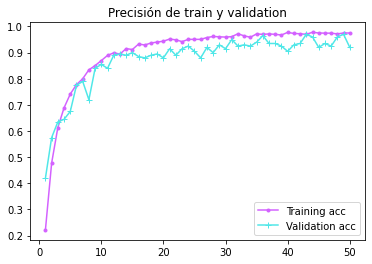

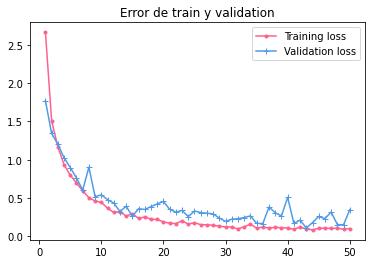


--TEST--
Test accuracy: 91.2%
Test acc:  0.9117646813392639
Test loss:  0.5025995969772339

--METATEST--
Meta-Test accuracy: 70.0%
Meta-Test acc: 0.699999988079071
Meta-Test loss: 4.576442718505859


 --------- VARIANTE  2 ---------


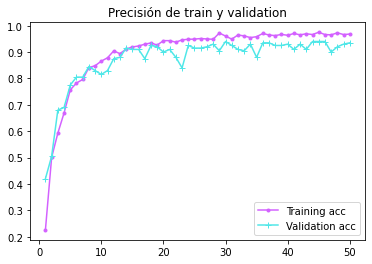

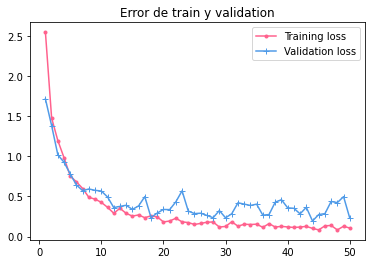


--TEST--
Test accuracy: 94.9%
Test acc:  0.9485294222831726
Test loss:  0.4786719083786011

--METATEST--
Meta-Test accuracy: 50.0%
Meta-Test acc: 0.5
Meta-Test loss: 2.122795581817627


 --------- VARIANTE  3 ---------


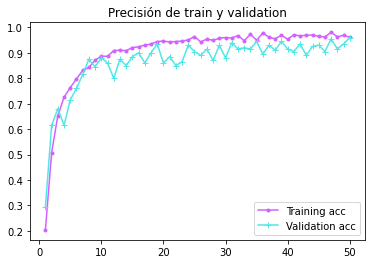

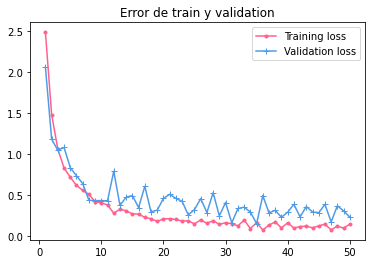


--TEST--
Test accuracy: 96.3%
Test acc:  0.9632353186607361
Test loss:  0.17614330351352692

--METATEST--
Meta-Test accuracy: 60.0%
Meta-Test acc: 0.6000000238418579
Meta-Test loss: 1.738664984703064


 --------- VARIANTE  4 ---------


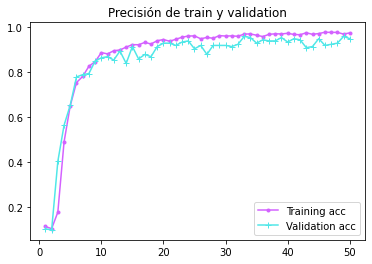

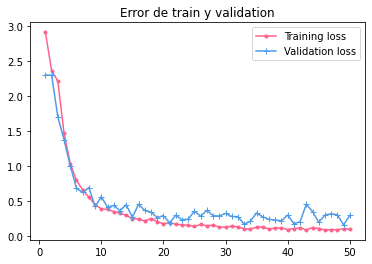


--TEST--
Test accuracy: 97.1%
Test acc:  0.970588207244873
Test loss:  0.4636193811893463

--METATEST--
Meta-Test accuracy: 40.0%
Meta-Test acc: 0.4000000059604645
Meta-Test loss: 7.839059352874756


 --------- VARIANTE  5 ---------


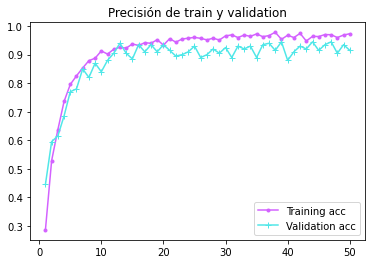

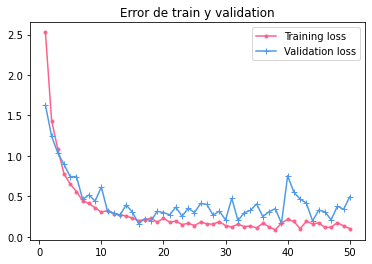


--TEST--
Test accuracy: 89.7%
Test acc:  0.8970588445663452
Test loss:  0.3691663444042206

--METATEST--
Meta-Test accuracy: 60.0%
Meta-Test acc: 0.6000000238418579
Meta-Test loss: 1.0210679769515991


 --------- VARIANTE  6 ---------


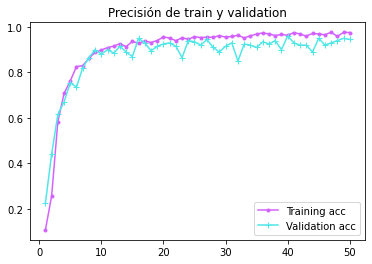

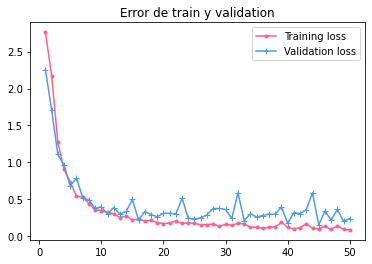


--TEST--
Test accuracy: 97.1%
Test acc:  0.970588207244873
Test loss:  0.15235355496406555

--METATEST--
Meta-Test accuracy: 50.0%
Meta-Test acc: 0.5
Meta-Test loss: 3.116649627685547


In [4]:
from tensorflow.keras.optimizers import Adam
from utiles import draw_history

########################################### COMP & FIT ###########################################

histories = list()

#Compilación y Entrenamiento
learning_rate = 0.0001
batch_size = 128
epochs = 50

index = 0
for model in models:

    index += 1
    print("\n\n --------- VARIANTE ", index, "---------")

    model.compile(
        loss='categorical_crossentropy',
        optimizer= Adam(learning_rate=learning_rate),
        metrics=['accuracy']
    )

    history = model.fit(
        it_train,
        epochs=epochs, 
        batch_size=batch_size,
        shuffle=True, 
        validation_data=it_validation, 
        verbose=0 
    )    

    loss_test, acc_test = model.evaluate(
                it_test,
                verbose=0
        ) 

    loss_mtest, acc_mtest = model.evaluate(
                it_mtest,
                verbose=0
                ) 
        
    
    draw_history(history)

    print("\n--TEST--")  
    print("Test accuracy: %.1f%%" % (100.0 * acc_test))  
    print("Test acc: ", acc_test)  
    print("Test loss: ", loss_test)  
    print("\n--METATEST--")  
    print("Meta-Test accuracy: %.1f%%" % (100.0 * acc_mtest))  
    print("Meta-Test acc:", acc_mtest)  
    print("Meta-Test loss:", loss_mtest)  
